In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("../Brows-a-car/src/Cluster_Segmentation/car_data.csv")

In [3]:
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
# Clean and prepare data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [5]:
df = df.rename(columns={"Market Category": "Market_Category", "Vehicle Size": "Vehicle_Size", "Vehicle Style": "Vehicle_Style"})

In [6]:
df.Market_Category.isna().sum()

3742

In [14]:
df.loc[df.Market_Category.isna()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway MPG,city mpg,Popularity,MSRP
87,Nissan,200SX,1996,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,36,26,2009,2000
88,Nissan,200SX,1996,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,36,26,2009,2000
91,Nissan,200SX,1997,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,35,25,2009,2000
92,Nissan,200SX,1997,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,35,25,2009,2000
93,Nissan,200SX,1998,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,35,25,2009,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11794,Subaru,XT,1991,regular unleaded,145.0,6.0,MANUAL,all wheel drive,2.0,NaN,Compact,Coupe,23,16,640,2000
11809,Toyota,Yaris iA,2017,regular unleaded,106.0,4.0,MANUAL,front wheel drive,4.0,NaN,Compact,Sedan,39,30,2031,15950
11810,Toyota,Yaris iA,2017,regular unleaded,106.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Sedan,40,32,2031,17050
11867,GMC,Yukon,2015,premium unleaded (recommended),420.0,8.0,AUTOMATIC,rear wheel drive,4.0,NaN,Large,4dr SUV,21,15,549,64520


In [7]:
df.Market_Category.fillna("No-Category", inplace=True)

In [17]:
df[df.Market_Category == 'No-Category']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway MPG,city mpg,Popularity,MSRP
87,Nissan,200SX,1996,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,No-Category,Compact,Coupe,36,26,2009,2000
88,Nissan,200SX,1996,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,No-Category,Compact,Coupe,36,26,2009,2000
91,Nissan,200SX,1997,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,No-Category,Compact,Coupe,35,25,2009,2000
92,Nissan,200SX,1997,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,No-Category,Compact,Coupe,35,25,2009,2000
93,Nissan,200SX,1998,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,No-Category,Compact,Coupe,35,25,2009,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11794,Subaru,XT,1991,regular unleaded,145.0,6.0,MANUAL,all wheel drive,2.0,No-Category,Compact,Coupe,23,16,640,2000
11809,Toyota,Yaris iA,2017,regular unleaded,106.0,4.0,MANUAL,front wheel drive,4.0,No-Category,Compact,Sedan,39,30,2031,15950
11810,Toyota,Yaris iA,2017,regular unleaded,106.0,4.0,AUTOMATIC,front wheel drive,4.0,No-Category,Compact,Sedan,40,32,2031,17050
11867,GMC,Yukon,2015,premium unleaded (recommended),420.0,8.0,AUTOMATIC,rear wheel drive,4.0,No-Category,Large,4dr SUV,21,15,549,64520


Year                5.745246e+01
Engine HP           1.192286e+04
Engine Cylinders    3.170392e+00
Number of Doors     7.767168e-01
highway MPG         7.855278e+01
city mpg            8.078052e+01
Popularity          2.078947e+06
MSRP                3.613104e+09
dtype: float64
(array([ 6350,  6351,  8486, 11362, 11363, 11364], dtype=int64),)


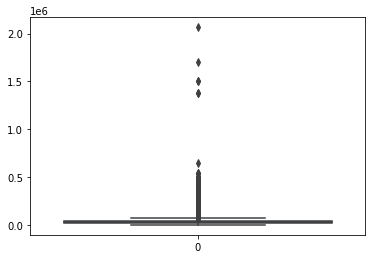

In [8]:
''' Remove some outliers from data '''
import seaborn as sns
print(df.var())
sns.boxplot(data=df['MSRP'])
print(np.where(df['MSRP'] > 1.0*10**6))

In [9]:
from scipy import stats
z_scores = np.abs(stats.zscore(df['MSRP']))
print("Z Score: ", z_scores)
outliers_pos = np.where(z_scores > 2.7)
print("Data outside of +2.7 STD: ", outliers_pos) # Data entries outside of 99.6% of the population of points

Z Score:  [0.09217398 0.00091942 0.07062017 ... 0.16679144 0.17178257 0.19298614]
Data outside of +2.7 STD:  (array([  460,   461,   462,   463,   464,   465,   466,   467,   468,
         469,   470,   471,   472,   473,   598,   599,   605,   606,
         607,   608,   609,   610,   611,   612,   613,   614,   615,
         616,   617,   618,   619,   620,   621,   622,   682,   683,
         684,   696,   697,   698,   699,   700,   701,   702,   703,
         704,  1452,  1453,  1454,  1455,  1456,  1457,  1458,  1459,
        1460,  1461,  1620,  1621,  1622,  1623,  1624,  1625,  1626,
        1627,  1628,  1629,  1630,  1631,  1676,  1677,  1678,  1679,
        2040,  2041,  2116,  2117,  2118,  2339,  2340,  2675,  2679,
        2683,  2849,  2850,  2851,  2855,  2856,  2857,  2858,  2862,
        2863,  2864,  2865,  2866,  2868,  2870,  2872,  2873,  2874,
        2875,  2876,  2877,  2878,  2879,  2880,  2881,  2884,  2885,
        2886,  2887,  2888,  2889,  2890,  2891,  

In [10]:
outliers = outliers_pos[0][:]
df.drop(outliers, inplace=True)
df.reset_index(inplace=True, drop=True)

In [11]:
df.shape

(11648, 16)

In [13]:
df.Market_Category.unique()

array(['Factory Tuner,Luxury,High-Performance', 'Luxury,Performance',
       'Luxury,High-Performance', 'Luxury', 'Performance', 'Flex Fuel',
       'Flex Fuel,Performance', 'No-Category', 'Hatchback',
       'Hatchback,Luxury,Performance', 'Hatchback,Luxury',
       'Luxury,High-Performance,Hybrid', 'Diesel,Luxury',
       'Hatchback,Performance', 'Hatchback,Factory Tuner,Performance',
       'High-Performance', 'Factory Tuner,High-Performance',
       'Exotic,High-Performance', 'Exotic,Factory Tuner,High-Performance',
       'Factory Tuner,Performance', 'Crossover',
       'Factory Tuner,Luxury,Performance', 'Flex Fuel,Luxury',
       'Crossover,Luxury', 'Hatchback,Factory Tuner,Luxury,Performance',
       'Crossover,Hatchback', 'Hybrid', 'Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance',
       'Exotic,Factory Tuner,Luxury,High-Performance',
       'Flex Fuel,Luxury,High-Performance', 'Crossover,Flex Fuel',
       'Diese

In [17]:
'''We could parse out each the entries that hold multiple categories and use a dictionary system to keep track
   and use one hot encoding to create new columns for each, but that would increase the dimensionality of our data/problem, 
   so to keep it simple we will label encode as is
'''
df.Market_Category = df.Market_Category.astype('category')
df["Market_Category_Enc"] = df.Market_Category.cat.codes
print(f"{len(df.Market_Category.unique())} categories")

68 categories


In [18]:
# Feature selection
''' For computational simplicity we will only select 3 features to learn from '''
X = df[["Market_Category_Enc", "Year", "MSRP"]]

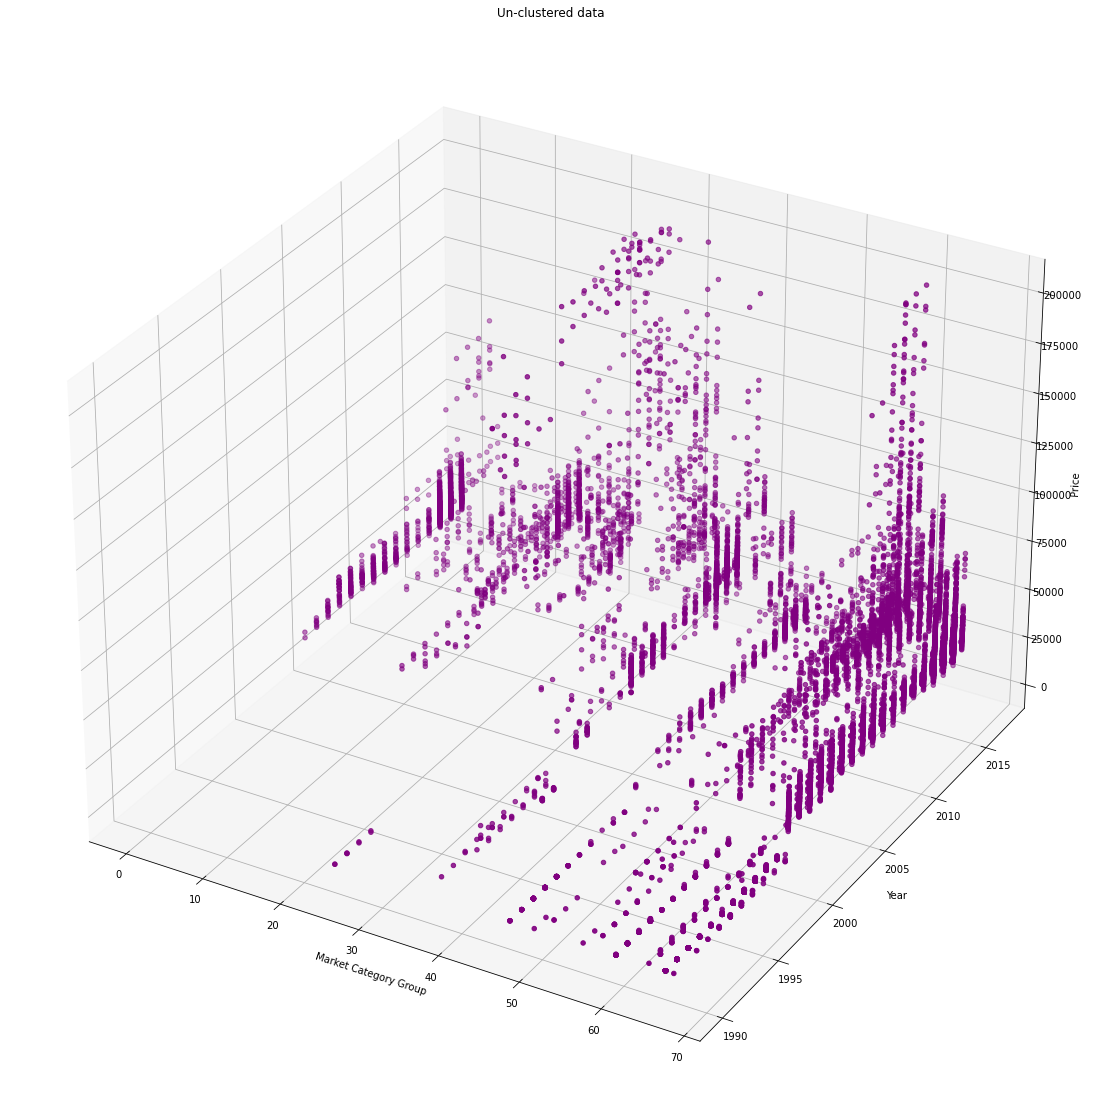

In [21]:
plt.figure(figsize=(20, 20))
ax = plt.axes(projection="3d")
ax.scatter3D(X["Market_Category_Enc"], X["Year"], X["MSRP"], color='purple')
plt.title("Un-clustered data")
ax.set_xlabel("Market Category Group")
ax.set_ylabel("Year")
ax.set_zlabel("Price")
plt.show()

In [22]:
# Preprocess data
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [23]:
# Fit model
k_means = KMeans(init = "k-means++", n_clusters=5, n_init=15) # find 5 clusters, run algorithim 15 times with different centroid seeds and select best model
k_means.fit(X)

KMeans(n_clusters=5, n_init=15)

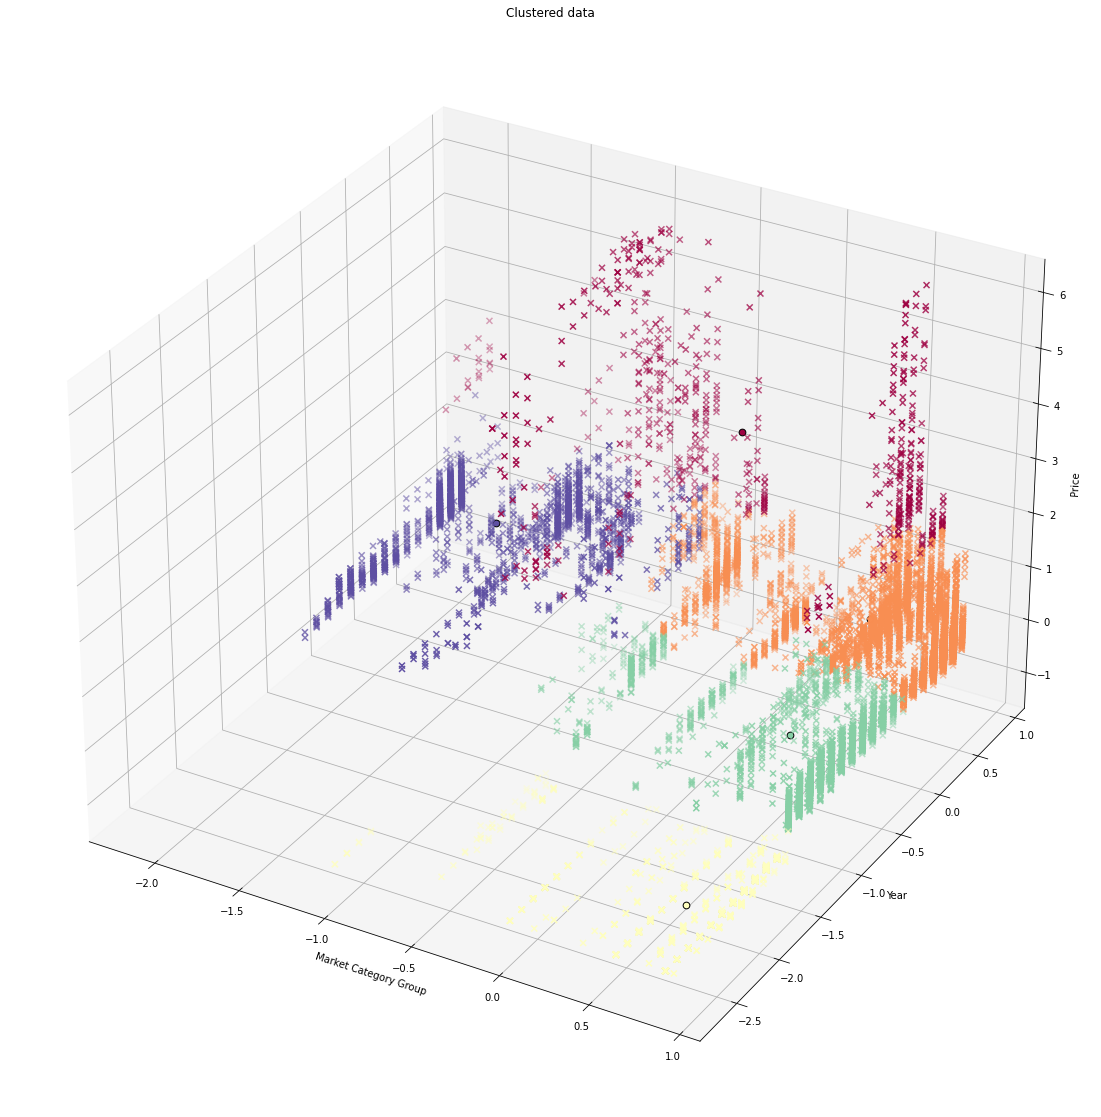

In [32]:
# Plot resulting clusters
plt.figure(figsize=(20, 20))
ax = plt.axes(projection="3d")
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means.labels_))))

for k, col in zip(range(len(k_means.labels_)), colors):
    cluster_members = (k_means.labels_ == k) # get indices of k_means labels array where the label is the current label k
    cluster_center = k_means.cluster_centers_[k] # get corresponding centroid based on current label k
    ax.scatter3D(X[cluster_members,0], X[cluster_members,1], X[cluster_members,2], color=col, marker='x', s=36)
    ax.scatter3D(cluster_center[0], cluster_center[1], cluster_center[2], color=col, marker='o', s=45, edgecolor='k')
    
plt.title("Clustered data")
ax.set_xlabel("Market Category Group")
ax.set_ylabel("Year")
ax.set_zlabel("Price")
plt.show()